# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how ='outer')
combined_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
a = combined_data['Mouse ID'].nunique()
b = mouse_metadata['Mouse ID'].nunique()
c = study_results['Mouse ID'].nunique()
print(f'There are {a} mice in merge data frame.')
print(f'There are {b} mice in mouse data frame.')
print(f'There are {c} mice in study data frame.')

There are 249 mice in merge data frame.
There are 249 mice in mouse data frame.
There are 249 mice in study data frame.


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_datagb = combined_data.copy()
combined_datagb['duplicated'] = combined_datagb.duplicated()
combined_datagb.query('duplicated != False')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_datagb['g989'] = (combined_datagb['Mouse ID'] == "g989")
combined_datagb.query('g989 != False')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated,g989
908,g989,Propriva,Female,21,26,0,45.000000,0,False,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False,True
911,g989,Propriva,Female,21,26,5,47.570392,0,False,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False,True
913,g989,Propriva,Female,21,26,10,49.880528,0,False,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False,True
915,g989,Propriva,Female,21,26,15,53.442020,0,False,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False,True
917,g989,Propriva,Female,21,26,20,54.657650,1,False,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_reasearch_data = combined_data.drop(range(908,921))
cleaned_reasearch_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
d = cleaned_reasearch_data['Mouse ID'].nunique()
print(f'There are {d} mice in cleaned study data frame.')

There are 248 mice in cleaned study data frame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = cleaned_reasearch_data.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
meanvolume = drug_group['Tumor Volume (mm3)'].mean()
medianvolume = drug_group['Tumor Volume (mm3)'].median()
varvolume = drug_group['Tumor Volume (mm3)'].var()
stdvarvolume = drug_group['Tumor Volume (mm3)'].std()
semvolume = drug_group['Tumor Volume (mm3)'].sem()
drug_group_stat = pd.DataFrame({
    "Mean Tumor Volume" : meanvolume,
    "Median Tumor Volume" : medianvolume,
    "Tumor Volume Variance" : varvolume,
    "Tumor Volume Std. Dev." : stdvarvolume,
    "Tumor Volume Std. Err." : semvolume,
    
})
drug_group_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

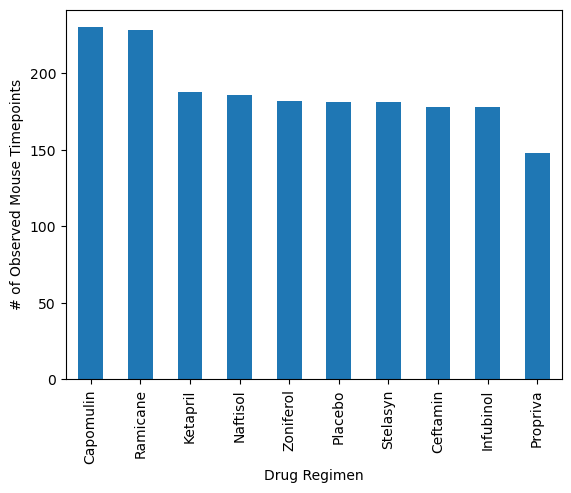

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = drug_group['Timepoint'].count().sort_values(ascending = False)
drug_counts.plot.bar(ylabel = "# of Observed Mouse Timepoints")


In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# x = drug_group('Drug Regimen').drop_duplicates()
# plt.bar(x,drug_counts)

<Axes: ylabel='Sex'>

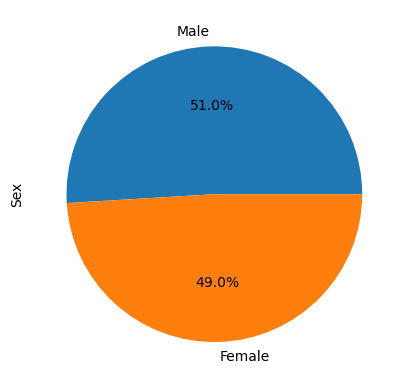

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_reasearch_data['Sex'].value_counts()
sex_counts.plot(kind='pie',autopct='%.1f%%')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [40]:
# Start by getting the last (greatest) timepoint for each mouse
Rami_tumorvols = cleaned_reasearch_data.loc[(cleaned_reasearch_data['Drug Regimen'] == "Ramicane"),:] 
Capo_tumorvols = cleaned_reasearch_data.loc[(cleaned_reasearch_data['Drug Regimen'] == "Capomulin"),:]
Infu_tumorvols = cleaned_reasearch_data.loc[(cleaned_reasearch_data['Drug Regimen'] == "Infubinol"),:]
Ceft_tumorvols = cleaned_reasearch_data.loc[(cleaned_reasearch_data['Drug Regimen'] == "Ceftamin"),:]


In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Rmaxtime = pd.DataFrame(Rami_tumorvols.groupby('Mouse ID').max()['Timepoint'])
Rlastvol = pd.merge(Rmaxtime, cleaned_reasearch_data, on =("Mouse ID","Timepoint"))
Camaxtime = pd.DataFrame(Capo_tumorvols.groupby('Mouse ID').max()['Timepoint'])
Calastvol = pd.merge(Camaxtime, cleaned_reasearch_data, on =("Mouse ID","Timepoint"))
Imaxtime = pd.DataFrame(Infu_tumorvols.groupby('Mouse ID').max()['Timepoint'])
Ilastvol = pd.merge(Imaxtime, cleaned_reasearch_data, on =("Mouse ID","Timepoint"))
Cemaxtime = pd.DataFrame(Ceft_tumorvols.groupby('Mouse ID').max()['Timepoint'])
Celastvol = pd.merge(Cemaxtime, cleaned_reasearch_data, on =("Mouse ID","Timepoint"))



In [42]:
# Put treatments into a list for for loop (and later for plot labels)
Capo_tumor = Calastvol['Tumor Volume (mm3)']
Rami_tumor = Rlastvol['Tumor Volume (mm3)'] 
Infu_tumor = Ilastvol['Tumor Volume (mm3)']
Ceft_tumor = Celastvol['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capoq= Capo_tumor.quantile([.25, .5 , .75])
capomed = capoq[0.5]
capolow = capoq[0.25]
capoupp = capoq[0.75]
capoiqr = capoupp - capolow
capolower = capolow - (1.5*capoiqr)
capohigher = capoupp + (1.5*capoiqr)
ramiq = Rami_tumor.quantile([.25, .5 , .75])
ramimed = ramiq[0.5]
ramilow = ramiq[0.25]
ramiupp = ramiq[0.75]
ramiiqr = ramiupp - ramilow
ramilower = ramilow - (1.5*ramiiqr)
ramihigher = ramiupp + (1.5*ramiiqr)
infuq = Infu_tumor.quantile([.25, .5 , .75])
infumed = infuq[0.5]
infulow = infuq[0.25]
infuupp = infuq[0.75]
infuiqr = infuupp - infulow
infulower = infulow - (1.5*infuiqr)
infuhigher = infuupp + (1.5*infuiqr)
ceftq = Ceft_tumor.quantile([.25, .5 , .75])
ceftmed = ceftq[0.5]
ceftlow = ceftq[0.25]
ceftupp = ceftq[0.75]
ceftiqr = ceftupp - ceftlow
ceftlower = ceftlow - (1.5*ceftiqr)
cefthigher = ceftupp + (1.5*ceftiqr)
   


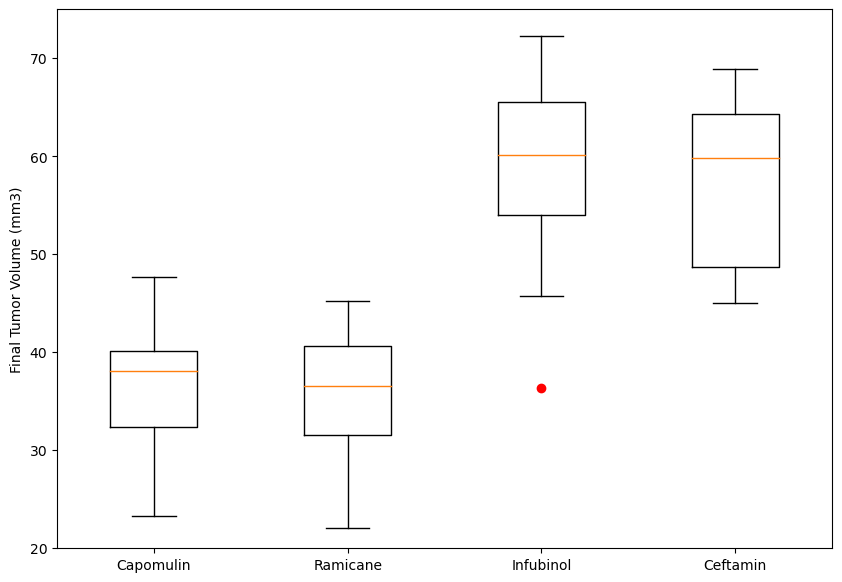

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

x_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data = [Capo_tumor, Rami_tumor, Infu_tumor , Ceft_tumor]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, labels=x_labels, sym='r')
plt.ylim(20, 75)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [44]:
a = pd.DataFrame({"Lower Quartiles" : [ capolow , ramilow, infulow, ceftlow],
                  "Upper Quartiles" : [capoupp , ramiupp, infuupp, ceftupp],
                  "IQR" : [capoiqr , ramiiqr, infuiqr, ceftiqr],
                  "Median" : [capomed, ramimed, infumed, ceftmed],
                  "Lower Outliers are smaller than" : [capolower, ramilower, infulower, ceftlower],
                  "Upper Outliers are larger than" : [capohigher, ramihigher, infuhigher, cefthigher],
                 }, index = [x_labels])

,Lower Quartiles,Upper Quartiles,IQR,Median,Lower Outliers are smaller than,Upper Outliers are larger than
Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


## Line and Scatter Plots

In [51]:
Capo_tumorvols['Mouse ID'].unique()


array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

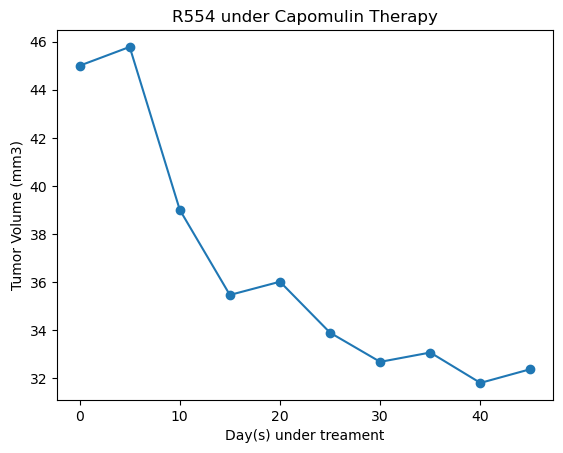

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouser554 = Capo_tumorvols.loc[Capo_tumorvols["Mouse ID"] == "r554",:]
xr554 = mouser554["Timepoint"]
yr554 = mouser554["Tumor Volume (mm3)"]
plt.title("R554 under Capomulin Therapy")
plt.xlabel("Day(s) under treament")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(xr554, yr554, marker="o")

/var/folders/r1/zhlchflx7dx5j7m6psls2c440000gn/T/ipykernel_874/2376572878.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capotumavg = Capo_tumorvols.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

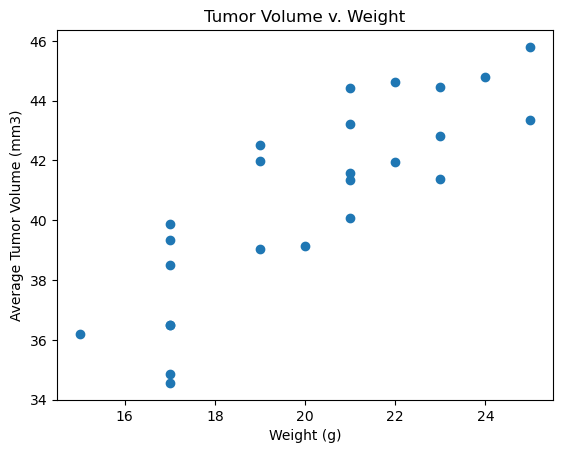

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capotumavg = Capo_tumorvols.groupby(['Mouse ID']).mean()
plt.scatter( capotumavg['Weight (g)'],capotumavg['Tumor Volume (mm3)'])
plt.title("Tumor Volume v. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


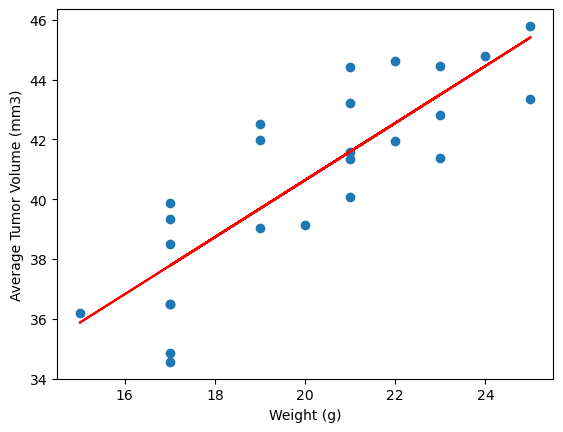

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [70]:
correlation = st.pearsonr(capotumavg['Weight (g)'],capotumavg['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation[0]}.')

The correlation between mouse weight and the average tumor volume is 0.8419363424694721.


In [73]:

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(capotumavg['Weight (g)'],capotumavg['Tumor Volume (mm3)'])  
Y_pred = linear_regressor.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[22. 21. 17. 19. 22. 24. 20. 23. 21. 21. 19. 17. 19. 25. 17. 25. 17. 23.
 17. 17. 21. 23. 21. 15. 17.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.